<a href="https://colab.research.google.com/github/Juosorioca420/DiplomadoCienciaDatos/blob/main/Tareas/Tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Breve Introduccion a la Regresión Logistica</h1>

---


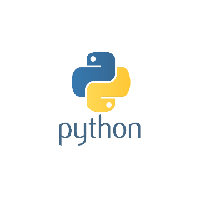

## Presentación

Julián David Osorio


> Estudiante de Ingeniería de Sistemas de la Universidad Nacional, interesado en Análisis de Datos y Finanzas.

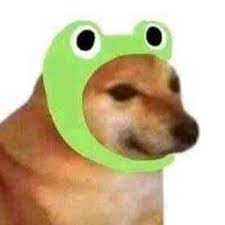

## Regresión Logistica

Es usual que se quiera estimar algún valor dependiente continuo, como el precio de venta de bienes raíces, no obstante, es una tarea muy importante la de predecir el valor categórico de algún dato, como lo puede ser predecir el tipo de medicina que un paciente necesita o la clasificación categórica de los cliente que hacen las empresas para brindar mejor servicio.

<br>

Para estimar la clase de una muestra, necesitamos algún tipo de orientación sobre cuál sería la **clase más probable** para dicha muestra. Para ello, utilizamos la **Regresión logística**.

La regresión logística es una variación de la regresión lineal, que se utiliza cuando la variable dependiente observada, y, es categórica. Produce una fórmula que predice la probabilidad de la etiqueta de clase en función de las variables independientes.

<br>

En la <b>regresión lineal</b> se encuentra una función que relaciona una variable dependiente continua, <b>y</b>, con algunas variables independientes $x_1$, $x_2$, $\cdots$ . La regresión lineal simple asume una función de la forma

\begin{align}
y = \theta_0 + \theta_1  x_1 + \theta_2  x_2 + \cdots
\end{align}

y encuentra los valores de los parámetros $\theta_0, \theta_1, \theta_2$, etc., donde el término $\theta_0$ es la "intersección".

\begin{align}
f(x) = \theta^T X
\end{align}

La regresión logística ajusta una curva especial en forma de s tomando la función de regresión lineal y transformando la estimación numérica en una probabilidad con la siguiente función, que se llama función sigmoidea (sigmoid) [ $𝜎$  ].

\begin{align}
ℓog(x) = \sigma({\theta^TX}) =  P(Y=1|X) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}}
\end{align}


La regresión logística pasa la entrada a través de $𝜎$ y luego trata el resultado como una probabilidad; hallando los mejores parámetros θ, para $ℓog(x)$, de tal forma que el modelo tenga como resultado la clase más probable en cada caso.



### Ejemplo

Veamos la probabilidad que tiene un cliente de cancelar el servicio de una compañia telefonica (churn)  usando un registro disponible en Internet.

> 0: No cancelo el Servicio

> 1: Cancelo el servicio

In [5]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [4]:
# Recolectar datos
data = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
df = pd.read_csv(data)

df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
df['churn'] = df['churn'].astype('int')

df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [6]:
# Definir variables independientes y dependientes
X = np.asarray( df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']] ) # matrix
y = np.asarray(df['churn'])

# Normalizar datos
X = preprocessing.StandardScaler().fit(X).transform(X)

# Datos de entrenamiento y de evaluación
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 4)
print('Train set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


In [7]:
# Modelamiento Regresion Logistica
LR = LogisticRegression(C = 0.01, solver='liblinear')
LR.fit(X_train,y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [9]:
# Predicción
p = LR.predict(X_test)
prob = LR.predict_proba(X_test)

print( p[:5], prob[:5], sep = '\n\n' )

[0 0 0 0 0]

[[0.54132919 0.45867081]
 [0.60593357 0.39406643]
 [0.56277713 0.43722287]
 [0.63432489 0.36567511]
 [0.56431839 0.43568161]]


In [10]:
# Evaluación
'''
Tamaño de la intersección dividido por el tamaño de la unión de los dos conjuntos de etiquetas.
Si todo el conjunto de etiquetas pronosticadas para una muestra coincide estrictamente con el verdadero conjunto de etiquetas,
entonces la precisión del subconjunto es 1,0; de lo contrario es 0.0.

'''

from sklearn.metrics import jaccard_score
jaccard_score(y_test, p, pos_label = 0)

0.7058823529411765

## Referencias

- [Logistic Function](http://en.wikipedia.org/wiki/Logistic_function?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01)
- [Logistic Regression - IBM](https://www.ibm.com/topics/logistic-regression)